## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata,study_results)
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice=len(mouse_data['Mouse ID'].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data[mouse_data.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse
mouse_data.drop_duplicates(keep="first")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data)

1893

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_drug=mouse_data.groupby('Drug Regimen')
mean_tumors=grouped_by_drug['Tumor Volume (mm3)'].mean().rename("Mean Tumor Volume")
median_tumors=grouped_by_drug['Tumor Volume (mm3)'].median().rename("Median Tumor Volume")
var_tumors=grouped_by_drug['Tumor Volume (mm3)'].var().rename("Tumor Volume Variance")
std_tumors=grouped_by_drug['Tumor Volume (mm3)'].std().rename("Tumor Volume Standard Deviation")
sem_tumors=grouped_by_drug['Tumor Volume (mm3)'].sem().rename("Tumor Volume SEM")
# This method is the most straighforward, creating multiple series and putting them all together at the end.
stat_table=pd.concat([mean_tumors,median_tumors,var_tumors,std_tumors,sem_tumors],axis=1)
stat_table







,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mouse_data2=mouse_data.groupby('Drug Regimen').describe()
# This method produces everything in a single groupby function
grouped_mouse_data2

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar and Pie Charts

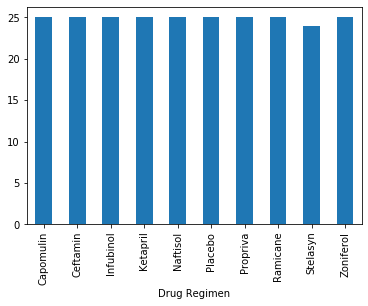

In [9]:
final_timepoint_data=mouse_data.groupby('Mouse ID').last().reset_index()
count_by_drug=final_timepoint_data.groupby('Drug Regimen').count()
count_by_drug['Mouse ID'].plot.bar()
plt.show()

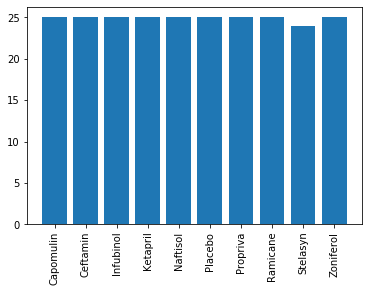

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(count_by_drug.index,count_by_drug['Mouse ID'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Male to Female Distribution')

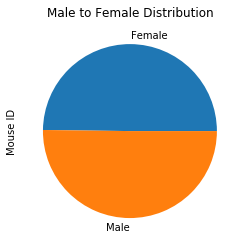

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=final_timepoint_data.groupby('Sex').count()
sex_count['Mouse ID'].plot.pie()
plt.title('Male to Female Distribution')

Text(0.5, 1.0, 'Male to Female Distribution')

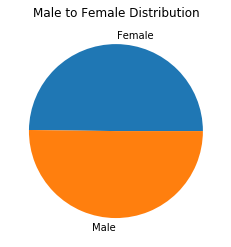

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count['Mouse ID'],labels=sex_count.index,)
plt.title('Male to Female Distribution')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
the_four_regimens=final_timepoint_data.loc[(final_timepoint_data['Drug Regimen'] == 'Capomulin')|
                         (final_timepoint_data['Drug Regimen'] =='Ramicane')|
                         (final_timepoint_data['Drug Regimen'] =='Infubinol')|
                         (final_timepoint_data['Drug Regimen'] =='Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
the_four_regimens

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,Ceftamin,Female,6,27,45,68.594745,4
240,y793,Capomulin,Male,17,17,45,31.896238,2
241,y865,Ceftamin,Male,23,26,45,64.729837,3
245,z578,Ramicane,Male,11,16,45,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = the_four_regimens['Tumor Volume (mm3)'].quantile(0.25)
Q3 = the_four_regimens['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_mice=the_four_regimens.loc[the_four_regimens['Drug Regimen']==treatments[0]]
ramicane_mice=the_four_regimens.loc[the_four_regimens['Drug Regimen']==treatments[1]]
infubinol_mice=the_four_regimens.loc[the_four_regimens['Drug Regimen']==treatments[2]]
ceftamin_mice=the_four_regimens.loc[the_four_regimens['Drug Regimen']==treatments[3]]
    # add subset 
tumor_data.append(capomulin_mice['Tumor Volume (mm3)'])
tumor_data.append(ramicane_mice['Tumor Volume (mm3)'])
tumor_data.append(infubinol_mice['Tumor Volume (mm3)'])
tumor_data.append(ceftamin_mice['Tumor Volume (mm3)'])
    # Determine outliers using upper and lower bounds
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

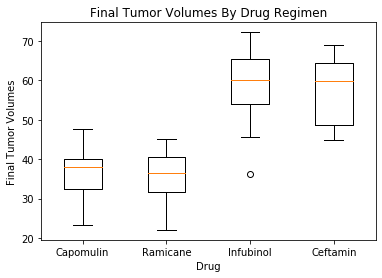

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
ax = fig.add_subplot()
bp = ax.boxplot(tumor_data)
position=[1,2,3,4]
plt.xticks(position,treatments)
plt.xlabel('Drug')
plt.ylabel('Final Tumor Volumes')
plt.title('Final Tumor Volumes By Drug Regimen')
plt.show()

## Line and Scatter Plots

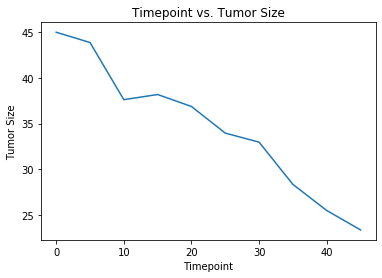

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=mouse_data.loc[mouse_data['Drug Regimen']==treatments[0]]
the_mouse=capomulin.loc[capomulin['Mouse ID']=='s185']
plt.plot(the_mouse['Timepoint'],the_mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")
plt.title("Timepoint vs. Tumor Size")
plt.show()

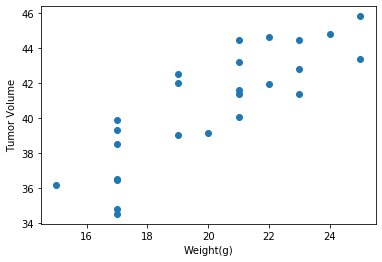

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap=capomulin.groupby('Mouse ID').mean()
weight=average_cap['Weight (g)']
atv=average_cap['Tumor Volume (mm3)']
plt.scatter(weight,atv)
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

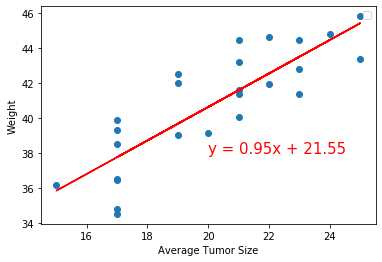

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,atv)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, atv)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,atv)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Average Tumor Size')
plt.ylabel('Weight')
plt.show()